# Milestone 1 Phase 2

# 1 - Perkenalan

> Bab pengenalan harus diisi dengan identitas, gambaran besar dataset yang digunakan, dan objective yang ingin dicapai.

> Name : Dzikri Furqoni Arief

> Batch : FTDS-018-RMT

> Task : Milestone 1

> Dataset : `Churn.csv` 

> Dataset Information:

- user_id:	ID of a customer
- age:	Age of a customer
- gender:	Gender of a customer
- region_category:	Region that a customer belongs to
- membership_category:	Category of the membership that a customer is using
- joining_date:	Date when a customer became a member
- joined_through referral:	Whether a customer joined using any referral code or ID
- preferred_offer: types	Type of offer that a customer prefers
- medium_of operation:	Medium of operation that a customer uses for transactions
- internet_option:	Type of internet service a customer uses
- last_visit_time:	The last time a customer visited the website
- days_since_last_login:	Number of days since a customer last logged into the website
- avg_time_spent:	Average time spent by a customer on the website
- avg_transaction_value:	Average transaction value of a customer
- avg_frequency_login_days:	Number of times a customer has logged in to the website
- points_in_wallet:	Points awarded to a customer on each transaction
- used_special_discount:	Whether a customer uses special discounts offered
- offer_application_preference:	Whether a customer prefers offers
- past_complaint:	Whether a customer has raised any complaints
- complaint_status:	Whether the complaints raised by a customer was resolved
- feedback:	Feedback provided by a customer
-churn_risk_score:	Churn score (0 : Not churn 1 : Churn)

> Objective :

- Make Artificial Neural Network (ANN) Model Using Sequential API and Funtional API and do model improvement for every model.
- Find out the best model to make Customer prediction, whether customer churn or not churn.

> Focus :

- Our focus is to avoid false negatives (Customer that predicted not churn, but will actually churn). Because in this bussines is very dangerous if we missclasified customer especially Customer that predicted not churn, but will actually churn, because we'll treat them the wrong way and can make us lose our customer.

# 2 - Import Library

> Cell pertama pada notebook harus berisi dan hanya berisi semua library yang digunakan dalam project.

In [1]:
!pip install feature-engine

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.4/319.4 KB 6.2 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay,confusion_matrix

Above is the library list we use on this project.

# 3 - Data Loading

> Bagian ini berisi proses penyiapan data sebelum dilakukan eksplorasi data lebih lanjut. Proses Data Loading dapat berupa memberi nama baru untuk setiap kolom, mengecek ukuran dataset, dll.

In [3]:
# Load Dataset

df = pd.read_csv('/content/drive/MyDrive/m1p2 /churn.csv')
df

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.490000,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.150000,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.140000,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.670000,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.990000,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,...,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,...,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,...,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0


In [4]:
# preview 5 data head from dataframe

df.head()

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,No Membership,2017-04-05,Yes,Without Offers,NaN,Wi-Fi,...,1184.49,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,Basic Membership,2017-03-31,Yes,Without Offers,Desktop,Fiber_Optic,...,338.15,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,Silver Membership,2017-02-11,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,235.14,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,No Membership,2015-12-23,No,Credit/Debit Card Offers,Desktop,Fiber_Optic,...,56.67,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,Silver Membership,2015-03-20,NaN,Gift Vouchers/Coupons,Smartphone,Wi-Fi,...,153.99,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0


In [5]:
# Preview 5 data tail from dataframe

df.tail()

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
37005,924e9c06f0c73817,36,M,Town,Gold Membership,2015-03-05,NaN,Credit/Debit Card Offers,NaN,Fiber_Optic,...,199.330000,29455.29,9.0,846.52,Yes,Yes,No,Not Applicable,User Friendly Website,0
37006,90e22286ac0acf04,27,F,City,Gold Membership,2017-01-15,Yes,Without Offers,Desktop,Wi-Fi,...,368.500000,27038.47,8.0,835.98,No,Yes,No,Not Applicable,Reasonable Price,0
37007,9329a6297407334a,20,M,NaN,Gold Membership,2015-07-11,Yes,Without Offers,NaN,Mobile_Data,...,272.130000,39305.35,27.0,714.90,Yes,Yes,Yes,Solved,Poor Customer Service,0
37008,a4403ddda8fcf9f3,38,F,City,Gold Membership,2016-05-25,Yes,Without Offers,Desktop,Wi-Fi,...,65.070000,46108.73,6.0,744.99,No,Yes,No,Not Applicable,Poor Website,0
37009,93b5d0330d24fa15,36,M,Town,Gold Membership,2016-10-18,NaN,Without Offers,Both,Fiber_Optic,...,972.776679,26905.49,22.0,700.93,Yes,No,Yes,No Information Available,Poor Customer Service,1


In [6]:
# Check the information from dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   membership_category           37010 non-null  object 
 5   joining_date                  37010 non-null  object 
 6   joined_through_referral       31568 non-null  object 
 7   preferred_offer_types         36722 non-null  object 
 8   medium_of_operation           31615 non-null  object 
 9   internet_option               37010 non-null  object 
 10  last_visit_time               37010 non-null  object 
 11  days_since_last_login         37010 non-null  int64  
 12  avg_time_spent                37010 non-null  float64
 13  a

From the data above, we can see the information. Our DataFrame consists of 22 columns and 37010 rows of data.

In [7]:
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
count,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000
mean,37.120697,-41.943502,279.201356,29272.430216,14.659540,623.590885,0.540881
std,15.866834,228.875324,330.017336,19445.963492,9.478756,270.218956,0.498333
min,10.000000,-999.000000,0.000000,800.460000,0.000000,0.000000,0.000000
25%,23.000000,8.000000,60.122500,14177.835000,7.000000,574.220000,0.000000
50%,37.000000,12.000000,161.770000,27554.485000,14.000000,680.400000,1.000000
75%,51.000000,16.000000,356.525000,40858.672500,22.000000,756.990000,1.000000
max,64.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761,1.000000


From the data above, we can see the information. For the Column *'age'* the min Value is 10 and the max value is 64, For column *'points_in_wallet'* min value is 0 and max value is 2069.

In [8]:
dfc=df.copy()

We make a copy of the dataframe, to keep the orginal dataframe safe.

# 4 - Exploratory Data Analysis (EDA)

> Bagian ini berisi eksplorasi data pada dataset diatas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

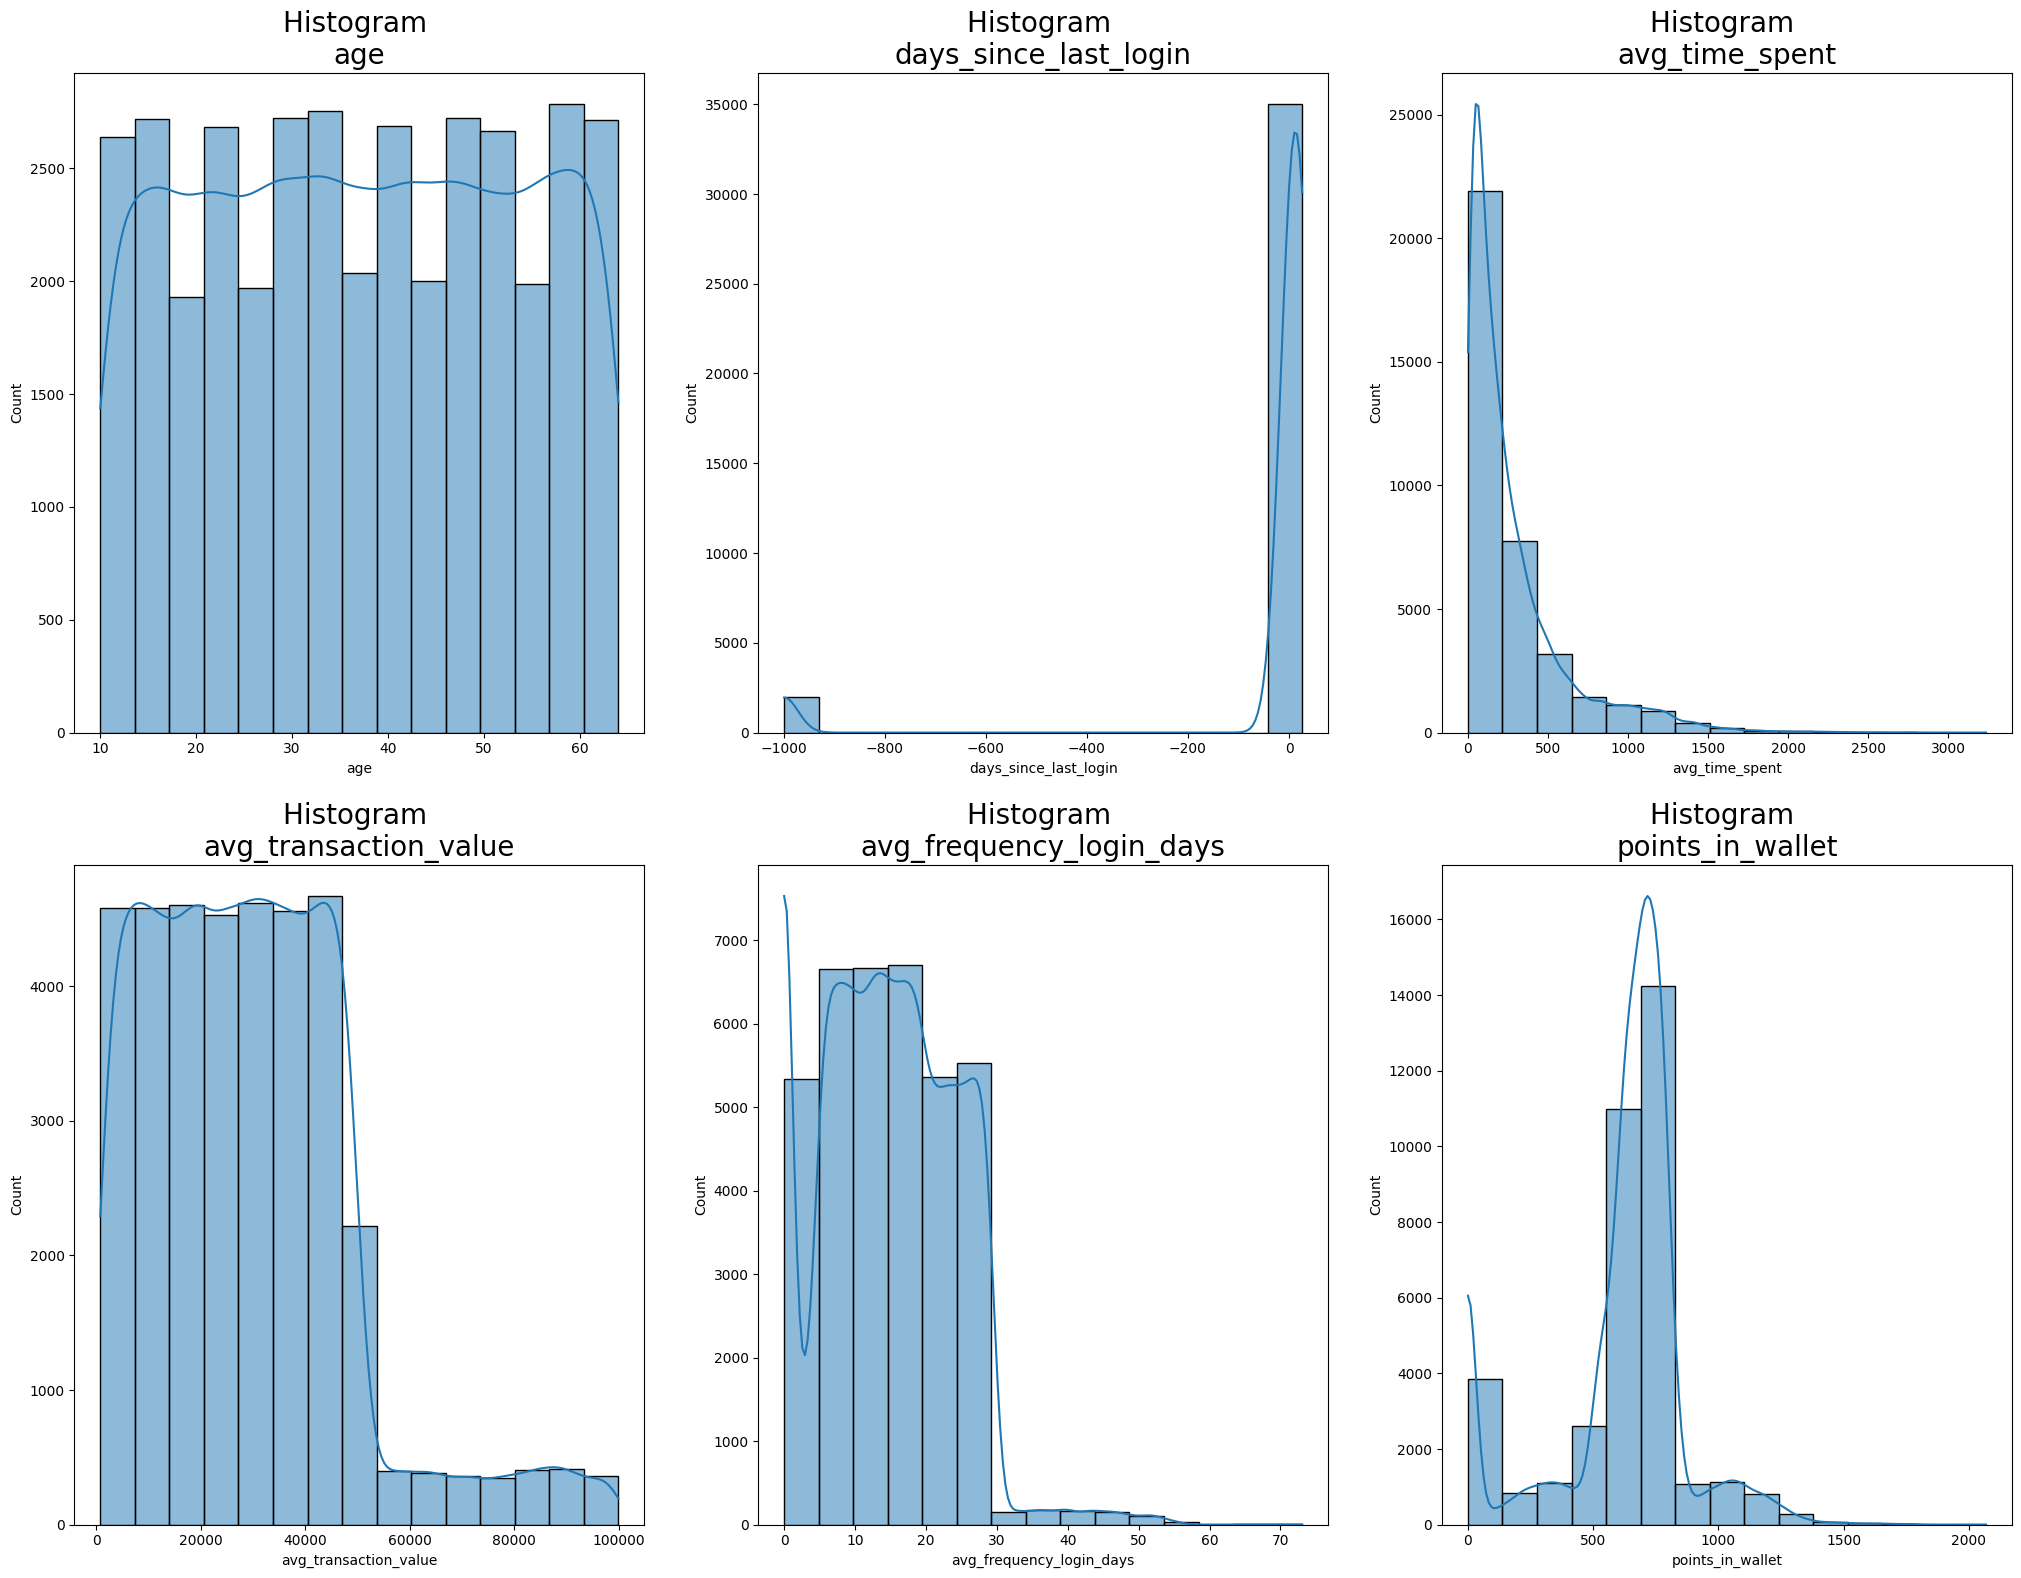

In [9]:
plt.figure(figsize=(25,60))

plt.subplot(6, 3, 1)
sns.histplot(df['age'], bins=15, kde=True)
plt.title('Histogram \nage', fontsize=20)

plt.subplot(6, 3, 2)
sns.histplot(df['days_since_last_login'], bins=15, kde=True)
plt.title('Histogram \ndays_since_last_login', fontsize=20)

plt.subplot(6, 3, 3)
sns.histplot(df['avg_time_spent'], bins=15, kde=True)
plt.title('Histogram \navg_time_spent', fontsize=20)

plt.subplot(6, 3, 4)
sns.histplot(df['avg_transaction_value'], bins=15, kde=True)
plt.title('Histogram \navg_transaction_value', fontsize=20)

plt.subplot(6, 3, 5)
sns.histplot(df['avg_frequency_login_days'], bins=15, kde=True)
plt.title('Histogram \navg_frequency_login_days', fontsize=20)

plt.subplot(6, 3, 6)
sns.histplot(df['points_in_wallet'], bins=15, kde=True)
plt.title('Histogram \npoints_in_wallet', fontsize=20)

plt.show()

Based on histogram graphs above, We can see the distribution data for each column, Only Column *'age'* that appears to have normal distributed data. And the other columns like *'days_since_last_login'*, *'avg_time_spent'*, *'avg_transaction_value'*, *'avg_transaction_value'*, *'avg_frequency_login_days'*, *'points_in_wallet'* are skewed distributed data.

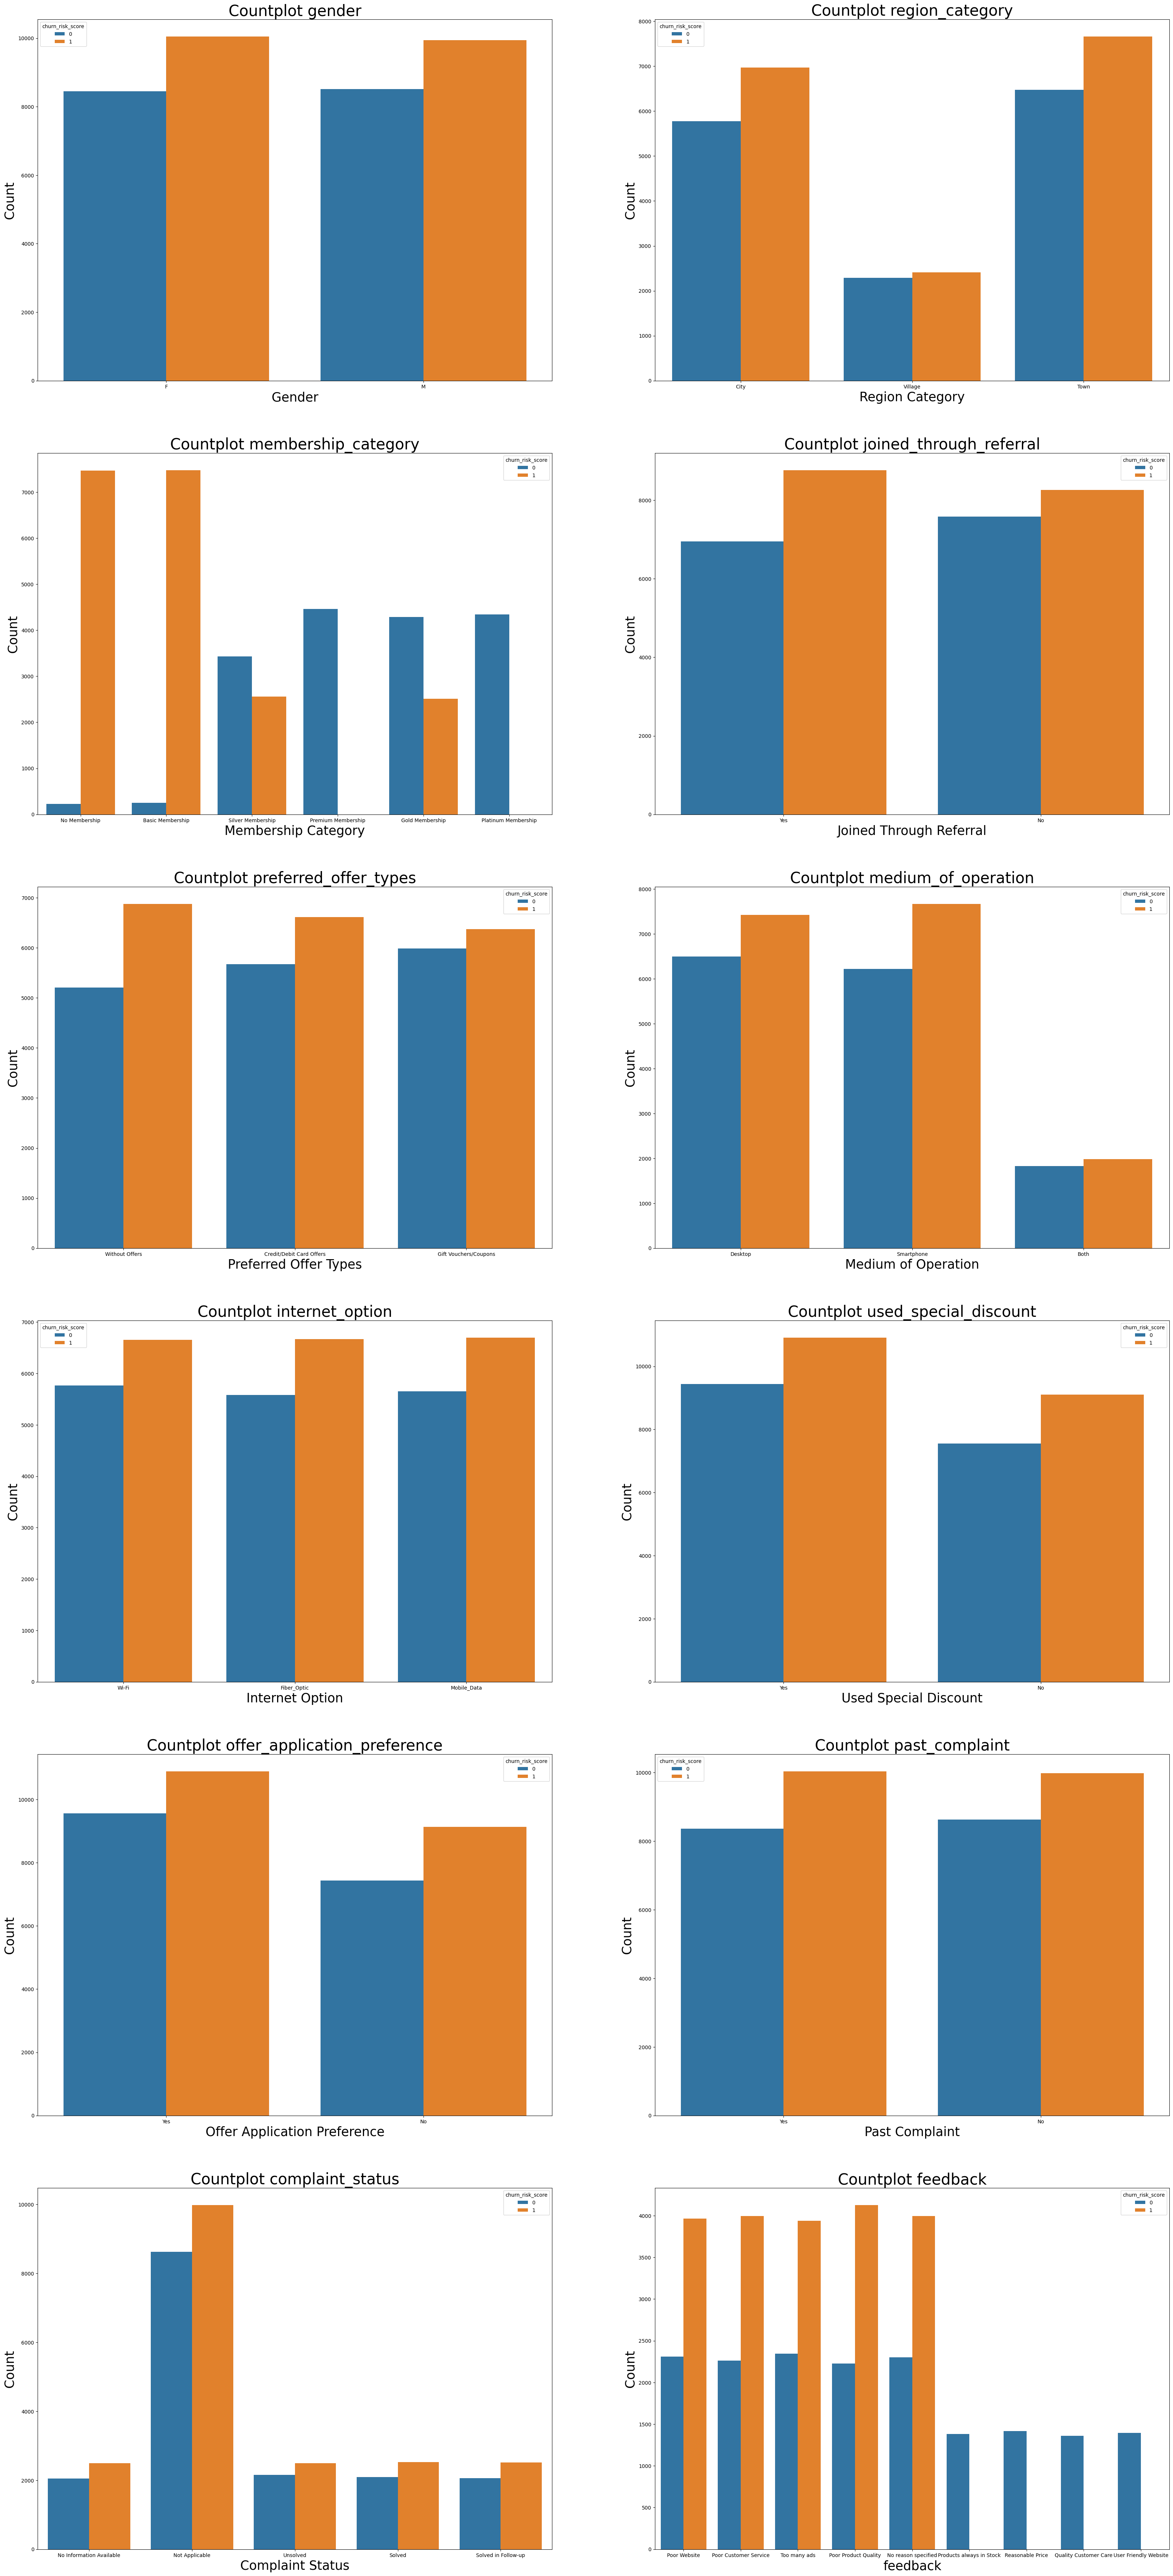

In [167]:
plt.figure(figsize=(40,90))

plt.subplot(6, 2, 1)
sns.countplot(x = "gender", hue="churn_risk_score", data = df)
plt.title('Countplot gender', fontsize=30)
plt.xlabel('Gender', fontsize=25)
plt.ylabel('Count', fontsize=25)

plt.subplot(6, 2, 2)
sns.countplot(x = "region_category", hue="churn_risk_score", data = df)
plt.title('Countplot region_category', fontsize=30)
plt.xlabel('Region Category', fontsize=25)
plt.ylabel('Count', fontsize=25)

plt.subplot(6, 2, 3)
sns.countplot(x = "membership_category", hue="churn_risk_score", data = df)
plt.title('Countplot membership_category', fontsize=30)
plt.xlabel('Membership Category', fontsize=25)
plt.ylabel('Count', fontsize=25)

plt.subplot(6, 2, 4)
sns.countplot(x = "joined_through_referral", hue="churn_risk_score", data = df)
plt.title('Countplot joined_through_referral', fontsize=30)
plt.xlabel('Joined Through Referral', fontsize=25)
plt.ylabel('Count', fontsize=25)

plt.subplot(6, 2, 5)
sns.countplot(x = "preferred_offer_types", hue="churn_risk_score", data = df)
plt.title('Countplot preferred_offer_types', fontsize=30)
plt.xlabel('Preferred Offer Types', fontsize=25)
plt.ylabel('Count', fontsize=25)

plt.subplot(6, 2, 6)
sns.countplot(x = "medium_of_operation", hue="churn_risk_score", data = df)
plt.title('Countplot medium_of_operation', fontsize=30)
plt.xlabel('Medium of Operation', fontsize=25)
plt.ylabel('Count', fontsize=25)

plt.subplot(6, 2, 7)
sns.countplot(x = "internet_option", hue="churn_risk_score", data = df)
plt.title('Countplot internet_option', fontsize=30)
plt.xlabel('Internet Option', fontsize=25)
plt.ylabel('Count', fontsize=25)

plt.subplot(6, 2, 8)
sns.countplot(x = "used_special_discount", hue="churn_risk_score", data = df)
plt.title('Countplot used_special_discount', fontsize=30)
plt.xlabel('Used Special Discount', fontsize=25)
plt.ylabel('Count', fontsize=25)

plt.subplot(6, 2, 9)
sns.countplot(x = "offer_application_preference", hue="churn_risk_score", data = df)
plt.title('Countplot offer_application_preference', fontsize=30)
plt.xlabel('Offer Application Preference', fontsize=25)
plt.ylabel('Count', fontsize=25)

plt.subplot(6, 2, 10)
sns.countplot(x = "past_complaint", hue="churn_risk_score", data = df)
plt.title('Countplot past_complaint', fontsize=30)
plt.xlabel('Past Complaint', fontsize=25)
plt.ylabel('Count', fontsize=25)

plt.subplot(6, 2, 11)
sns.countplot(x = "complaint_status", hue="churn_risk_score", data = df)
plt.title('Countplot complaint_status', fontsize=30)
plt.xlabel('Complaint Status', fontsize=25)
plt.ylabel('Count', fontsize=25)

plt.subplot(6, 2, 12)
sns.countplot(x = "feedback", hue="churn_risk_score", data = df)
plt.title('Countplot feedback', fontsize=30)
plt.xlabel('feedback', fontsize=25)
plt.ylabel('Count', fontsize=25)

plt.show()

From The countplots graphs above we can see the information of correlation from each columns to *'churn_risk_score'* Column. 

- *'gender'* Column: There's no big different between male and female to our target, so this column doesn't have enough correlation to our target.

- *'region_country'* Column: From this column also no big different from each category to our target, so this column doesn't have enough correlation to our target.

- *'membership_category'* Column: From this column we can see big different from each category to our target, no membership and Basic membership have very high probability to churn. then premium and platinum membership have very high probability to not churn. so the conclusion is *'membership_category'* have big correlation to our target.

- *'joined_through_referral'* Column: From this column we can see a different for each category, the category yes is having high probability to churn than the category no, so this column have correlation to our target.

- *'preferred_offer_types'* Column: From this column also we can see no big different from each category to our target, But the category 'without offer' is have more probability to churn than other categories.

- *'medium_of_operation'* Column: From this column also we can see a different from each category to our target, the category smartphone is having more probability to churn than other category so this column also have correlation to our target.

- *'internet_option'* Column: From this column also we can see no big different from each category to our target, so this column doesn't have enough correlation to our target.

- *'used_special_discount'* Column: From this column also we can see no big different from each category to our target, so this column doesn't have enough correlation to our target.

- *'offer_application_preference'* Column: From this column also we can see no big different from each category to our target, so this column doesn't have enough correlation to our target.

- *'past_complaint'* Column: From this column also we can see no big different from each category to our target, so this column doesn't have enough correlation to our target.

- *'complaint_status'* Column: From this column also we can see no big different from each category to our target, But the category 'not applicable' is have more probability to churn than other categories. so this column still have correlation to our target.

- *'feedback'* Column: From this column we can see big different from each category to our target, we can split this columns into 2 categories, 'good feedback' and 'bad feedback'. For 'bad feedback' there's high probability for customer to churn, and for 'good feedback' all the customer in this category are not churn.

After we Analyze this EDA we found out that we have 6 column that have correlation to our target, *'joined_through_referral'*, *'membership_category'* 
, *'preferred_offer_types'*, *'medium_of_operation'*, *'complaint_status'*, *'feedback'* so we will use this column on features selection.


churn risk score (0 = Not Churn, 1 = Churn): 
 1    20018
0    16992
Name: churn_risk_score, dtype: int64


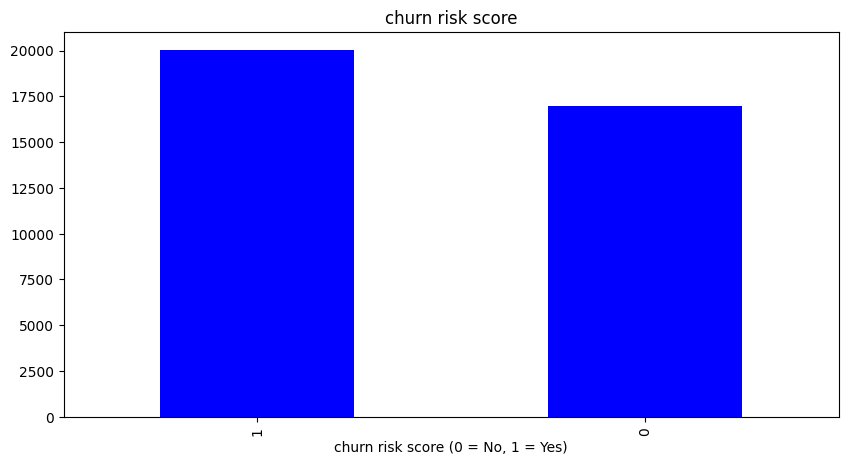

In [11]:
df['churn_risk_score'].value_counts().plot(kind='bar', figsize=(10, 5), color='Blue')
plt.xlabel('churn risk score (0 = No, 1 = Yes)')
plt.title('churn risk score')
print('churn risk score (0 = Not Churn, 1 = Churn): \n', df['churn_risk_score'].value_counts())

From the data and graphs above we can see information from our target. Label 0 = not churn have value 16992 and label 1 = Churn have value 20018. The target data from dataframe have proportion 0.55/0.45 so the data from our target is still balance. Because doesn't have much different.

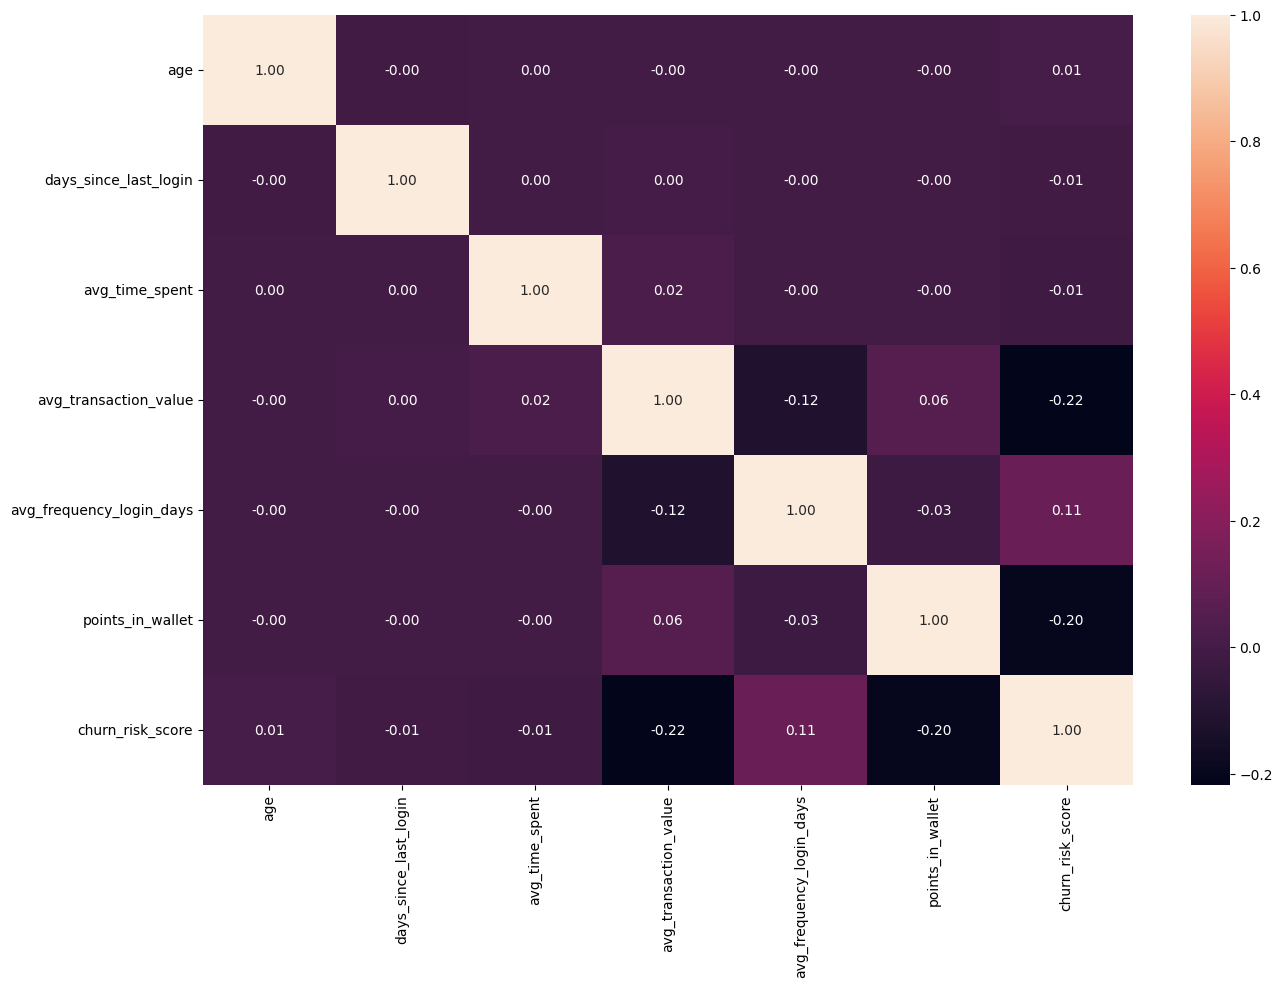

CPU times: user 690 ms, sys: 62.2 ms, total: 752 ms
Wall time: 905 ms


,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
churn_risk_score,0.006233,-0.006015,-0.013396,-0.217906,0.113436,-0.200284,1.000000
avg_frequency_login_days,-0.001738,-0.000678,-0.001355,-0.116690,1.000000,-0.025818,0.113436
age,1.000000,-0.003922,0.000746,-0.000333,-0.001738,-0.001002,0.006233
days_since_last_login,-0.003922,1.000000,0.000058,0.004043,-0.000678,-0.000014,-0.006015
avg_time_spent,0.000746,0.000058,1.000000,0.023113,-0.001355,-0.001239,-0.013396
points_in_wallet,-0.001002,-0.000014,-0.001239,0.056447,-0.025818,1.000000,-0.200284
avg_transaction_value,-0.000333,0.004043,0.023113,1.000000,-0.116690,0.056447,-0.217906


In [12]:
# Heatmap Correlation Matrix

%%time
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.2f')
plt.show()

df.corr().sort_values('churn_risk_score', ascending=False)

From heatmap correlation matrix and the data above we can see the information for numerical columns that have correlation to our target. *'avg_frequency_login_days'* column have the biggest positive corelation to our target. and  *'avg_transaction_value'* and *'points_in_wallet'* have the biggest negative correlation to our target. And the other columns seems doesn't have enough correlation to our target.

# 5 - Feature Engineering

> Bagian ini berisi proses penyiapan data untuk proses pelatihan model, seperti pembagian data menjadi train-val-test, transformasi data (normalisasi, encoding, dll.), dan proses-proses lain yang dibutuhkan.

## 5.1 - Handling Missing Values

In [13]:
# Checking missing value on DataFrame

dfc.isnull().sum()

user_id                            0
age                                0
gender                            59
region_category                 5431
membership_category                0
joining_date                       0
joined_through_referral         5442
preferred_offer_types            288
medium_of_operation             5395
internet_option                    0
last_visit_time                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

As we can see from the data above, we have missing value on this datasets. The columns with missing value is *'gender'*, *'region_category'*, *'joined_through_referral'*, *'preferred_offer_types'*, *'medium_of_operation'*. And the column with most missing value is *'joined_through_referral'* column with 5442 data missing. After chechking we'll handling the missing value with imputation because if we handle with dropna, we'll lose around 14% of data and i think is not good because too much data will lose. 

In [14]:
mode_values = dfc[['gender', 'region_category', 'joined_through_referral',
                   'preferred_offer_types', 'medium_of_operation']].mode().iloc[0]

In [15]:
mode_values

gender                                         F
region_category                             Town
joined_through_referral                       No
preferred_offer_types      Gift Vouchers/Coupons
medium_of_operation                      Desktop
Name: 0, dtype: object

In [16]:
dfc[['gender', 'region_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation']] = dfc[['gender', 'region_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation']].fillna(mode_values)

In [17]:
# Checking missing value on DataFrame

dfc.isnull().sum()

user_id                         0
age                             0
gender                          0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
last_visit_time                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64

We can see from the data above, after we handling missing value with imputation, now our DataFrame doesn't have any mimssing value. Because all the columns with missing value is categorical columns, we do imputatio with mode. 

## 5.2 - Handling Duplicate

In [18]:
# Show the duplicate rows

duplicate = dfc.duplicated().sum()
print("Duplicate Rows :", duplicate)

Duplicate Rows : 18


After checking, we can see from the data above there's a duplicate data in our Data Frame, the Total is 18 rows duplicate data, we'll handling the duplicate with drop.

In [19]:
dfc = dfc.drop_duplicates()

In [20]:
# Show the duplicate rows

dfc.duplicated().sum()

0

After we drop the duplicated data, now our DataFrame is clear from duplicated data, We can see from the data above now we have 0 duplicated data in our dataframe.

## 5.3 - Splitting between `X` and `y`

In [169]:
# Splitting between `X` and `y`

X = dfc.drop('churn_risk_score', axis=1)
y = dfc['churn_risk_score']

## 5.4 - Split Between Train-Set, Val-Set and Test-Set

In [170]:
# Split between Train-Set, Val-Set, and Test-Set

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=28)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.15, random_state=28)

print('Train Size : ', X_train.shape)
print('Val Size : ', X_val.shape)
print('Test Size : ', X_test.shape)

Train Size :  (26726, 21)
Val Size :  (4717, 21)
Test Size :  (5549, 21)


## 5.5 - Handling Outlier

In [171]:
X_train.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet
count,26726.000000,26726.000000,26726.000000,26726.000000,26726.000000,26726.000000
mean,37.197224,-42.056424,279.901555,29235.143715,14.636721,623.137830
std,15.899174,229.102254,329.169256,19455.075096,9.468196,270.099013
min,10.000000,-999.000000,0.000000,804.340000,0.000000,0.000000
25%,23.000000,8.000000,60.360000,14095.160000,7.000000,573.977500
50%,37.000000,12.000000,163.015000,27585.300000,14.000000,680.460000
75%,51.000000,16.000000,359.100000,40831.365000,22.000000,757.057500
max,64.000000,26.000000,3235.578521,99914.050000,73.061995,1780.720173


- From our analysis on EDA section, with heatmap correlation matrix, we found out that *'age'*, *'days_since_last_login'* columns almost doesn't have correlation to our target, so we will drop this columns later on features selection, so we skip this columns for outlier handling. 

- And also From our analysis on EDA section using Histogram, we found out all the columns we want to handle is Skewd columns so we'll using IQR method for outlier Handling.

In [172]:
# Create function to boundaries for skewed distribution using IQR method

def find_skewed_boundaries(df, variable, factor):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * factor)
    upper_boundary = df[variable].quantile(0.75) + (IQR * factor)

    return upper_boundary, lower_boundary

In [173]:
# Define bpundary values to find out outliers

upper_ats, lower_ats = find_skewed_boundaries(X_train, 'avg_time_spent', 3)
upper_atv, lower_atv = find_skewed_boundaries(X_train, 'avg_transaction_value', 3)
upper_afl, lower_afl = find_skewed_boundaries(X_train, 'avg_frequency_login_days', 3)
upper_piw, lower_piw = find_skewed_boundaries(X_train, 'points_in_wallet', 3)

In [174]:
# Flag outliers in these features

outliers_ats = np.where(X_train['avg_time_spent'] > upper_ats, True,
                       np.where(X_train['avg_time_spent'] < lower_ats, True, False))

outliers_atv = np.where(X_train['avg_transaction_value'] > upper_atv, True,
                       np.where(X_train['avg_transaction_value'] < lower_atv, True, False))

outliers_afl = np.where(X_train['avg_frequency_login_days'] > upper_afl, True,
                       np.where(X_train['avg_frequency_login_days'] < lower_afl, True, False))

outliers_piw = np.where(X_train['points_in_wallet'] > upper_piw, True,
                       np.where(X_train['points_in_wallet'] < lower_piw, True, False))



X_train_trimmed = X_train.loc[~(outliers_ats + outliers_atv + outliers_afl + outliers_piw)]
print('Shape prior trimming : ', X_train.shape)
print('Shape after trimming : ', X_train_trimmed.shape)

Shape prior trimming :  (26726, 21)
Shape after trimming :  (23428, 21)


After Checking outlier on X_train we found out that in our DataFrame have big numbers of outlier, on X_train we have outlier around 12% and i think if we handle with triming, we'll lose much data, so for outlier handling we'll handle with capping methode using winsorizer. same for X_Val also we'll handle using capping method using winsorizer.

In [175]:
# Handling Outlier using Capping methode, using winsorizer.

winsorizer = Winsorizer(capping_method='iqr', tail='both', fold=3, 
                        variables=['avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet'])

winsorizer.fit(X_train, X_val)

Winsorizer(capping_method='iqr', tail='both',
           variables=['avg_time_spent', 'avg_transaction_value',
                      'avg_frequency_login_days', 'points_in_wallet'])

In [176]:
# Do Transformation using winsorizer for X_train and X_val
X_train = winsorizer.transform(X_train)

X_val = winsorizer.transform(X_val)

In [177]:
X_train.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet
count,26726.000000,26726.000000,26726.000000,26726.000000,26726.000000,26726.000000
mean,37.197224,-42.056424,273.369572,29235.143715,14.636492,624.855733
std,15.899174,229.102254,302.724361,19455.075096,9.466856,262.468205
min,10.000000,-999.000000,0.000000,804.340000,0.000000,24.737500
25%,23.000000,8.000000,60.360000,14095.160000,7.000000,573.977500
50%,37.000000,12.000000,163.015000,27585.300000,14.000000,680.460000
75%,51.000000,16.000000,359.100000,40831.365000,22.000000,757.057500
max,64.000000,26.000000,1255.320000,99914.050000,67.000000,1306.297500


This is X_train data after we do handling outlier with capping methode, now the value after we handling outlier is more realistic than before we handling the outlier. 

## 5.6 - Feature Selection

In [30]:
X_train

,user_id,age,gender,region_category,membership_category,joining_date,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,...,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
19489,8cfb573dfff943c0,49,M,Town,No Membership,2017-02-28,Yes,Without Offers,Desktop,Fiber_Optic,...,14,766.91,47215.70,28.0,609.210000,Yes,No,Yes,Solved,Poor Website
11620,bebef4c3d9919748,22,M,Town,Basic Membership,2017-04-22,No,Without Offers,Desktop,Fiber_Optic,...,13,79.64,18100.45,6.0,24.737500,No,Yes,Yes,No Information Available,Poor Website
34648,a81fff6932612dac,25,F,City,Silver Membership,2015-08-20,No,Without Offers,Desktop,Mobile_Data,...,13,135.21,3561.26,17.0,24.737500,Yes,No,Yes,Solved,Too many ads
24382,b83e8e919d235c47,13,F,Town,Platinum Membership,2017-08-17,Yes,Gift Vouchers/Coupons,Smartphone,Mobile_Data,...,14,1255.32,992.97,0.0,798.680000,Yes,Yes,Yes,No Information Available,Too many ads
20088,b1101c91b7b401d3,21,F,Town,Premium Membership,2016-09-04,Yes,Gift Vouchers/Coupons,Smartphone,Fiber_Optic,...,14,33.76,16656.88,5.0,739.850000,Yes,No,Yes,Solved in Follow-up,Poor Customer Service
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23485,836a8f5c1e0157d9,44,M,Village,Silver Membership,2016-12-14,No,Without Offers,Smartphone,Fiber_Optic,...,15,191.07,18362.31,20.0,24.737500,Yes,No,Yes,Solved in Follow-up,Poor Customer Service
23890,8ba836dc017d7827,41,F,Village,Basic Membership,2017-10-15,No,Credit/Debit Card Offers,Smartphone,Fiber_Optic,...,1,435.79,38799.97,28.0,638.200000,No,Yes,Yes,Unsolved,Poor Product Quality
30068,9520db412aac42b5,46,M,City,Platinum Membership,2017-05-12,Yes,Without Offers,Desktop,Fiber_Optic,...,3,319.94,55275.17,13.0,207.437062,Yes,No,No,Not Applicable,Reasonable Price
7788,acaa1604bf8f0cd3,57,F,Town,Basic Membership,2015-10-06,Yes,Credit/Debit Card Offers,Smartphone,Wi-Fi,...,4,128.21,30961.28,26.0,632.570000,Yes,No,Yes,Unsolved,Poor Customer Service


In [31]:
# Drop Columns

X_train.drop(['user_id', 'age',	'joining_date', 'last_visit_time', 'days_since_last_login', 'gender', 'used_special_discount', 'internet_option', 'past_complaint'], axis=1, inplace=True)
X_val.drop(['user_id', 'age',	'joining_date', 'last_visit_time', 'days_since_last_login', 'gender', 'used_special_discount', 'internet_option', 'past_complaint'], axis=1, inplace=True)
X_test.drop(['user_id', 'age',	'joining_date', 'last_visit_time', 'days_since_last_login', 'gender', 'used_special_discount', 'internet_option', 'past_complaint'], axis=1, inplace=True)
X_train

,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,offer_application_preference,complaint_status,feedback
19489,Town,No Membership,Yes,Without Offers,Desktop,766.91,47215.70,28.0,609.210000,No,Solved,Poor Website
11620,Town,Basic Membership,No,Without Offers,Desktop,79.64,18100.45,6.0,24.737500,Yes,No Information Available,Poor Website
34648,City,Silver Membership,No,Without Offers,Desktop,135.21,3561.26,17.0,24.737500,No,Solved,Too many ads
24382,Town,Platinum Membership,Yes,Gift Vouchers/Coupons,Smartphone,1255.32,992.97,0.0,798.680000,Yes,No Information Available,Too many ads
20088,Town,Premium Membership,Yes,Gift Vouchers/Coupons,Smartphone,33.76,16656.88,5.0,739.850000,No,Solved in Follow-up,Poor Customer Service
...,...,...,...,...,...,...,...,...,...,...,...,...
23485,Village,Silver Membership,No,Without Offers,Smartphone,191.07,18362.31,20.0,24.737500,No,Solved in Follow-up,Poor Customer Service
23890,Village,Basic Membership,No,Credit/Debit Card Offers,Smartphone,435.79,38799.97,28.0,638.200000,Yes,Unsolved,Poor Product Quality
30068,City,Platinum Membership,Yes,Without Offers,Desktop,319.94,55275.17,13.0,207.437062,No,Not Applicable,Reasonable Price
7788,Town,Basic Membership,Yes,Credit/Debit Card Offers,Smartphone,128.21,30961.28,26.0,632.570000,No,Unsolved,Poor Customer Service


> For Features selection our reference is analysis on EDA:

- Categorical columns: from our analysis on EDA section and we found out we only have 6 columns that have correlation to our target the columns is *'joined_through_referral'*, *'membership_category'* 
, *'preferred_offer_types'*, *'medium_of_operation'*, *'complaint_status'*, *'feedback'*. So except of these 6 columns we'll drop the rest of columns.

- Numerical Columns: From our analysis on EDA section, with heatmap correlation matrix, we found out that *'age'*, *'days_since_last_login'* columns almost doesn't have correlation to our target, so we will drop this columns.

- Others Columns: For other columns like *'user_id'* and *'joining_date'* this columns only complementary columns and doesn't have any correlation to our target so we'll also drop this columns.


## 5.7 Get Numerical Columns and categorical Columns


In [32]:
num_columns = X_train.select_dtypes(include=np.number).columns.tolist()
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Num Columns : ', num_columns)
print('Cat Columns : ', cat_columns)

Num Columns :  ['avg_time_spent', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet']
Cat Columns :  ['region_category', 'membership_category', 'joined_through_referral', 'preferred_offer_types', 'medium_of_operation', 'offer_application_preference', 'complaint_status', 'feedback']


## 5.8 Pipeline 

In [33]:
# Create A Pipeline

num_pipeline = make_pipeline(MinMaxScaler())

cat_pipeline = make_pipeline(OneHotEncoder())

final_pipeline = ColumnTransformer([
    ('pipe_num', num_pipeline, num_columns),
    ('pipe_cat', cat_pipeline, cat_columns)
])

We make scikit-learn pipeline to make our preprocessing more efficient, We use MinMaxScaler for scaling because the numerical columns we use as features is skew columns and not a normal distributed, and for encoding we use OneHotEncoder.

In [34]:
# Fit and Transform

X_train = final_pipeline.fit_transform(X_train)
X_val = final_pipeline.transform(X_val)
X_test = final_pipeline.transform(X_test)

In [35]:
X_train.shape

(26726, 37)

## 5.9 Input Pipelines with Tensorflow

In [36]:
# Create a training Dataset pipelines, slice and shuffle train dataset.

train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(buffer_size=128, seed=25).batch(64)

# Get validation dataset.
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(64)

# Get a test dataset.
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(64)

In [37]:
# Check How Many Batch Groups

print('Number of Batch - Train : ', tf.data.experimental.cardinality(train_dataset).numpy())
print('Number of Batch - Valid : ', tf.data.experimental.cardinality(val_dataset).numpy())
print('Number of Batch - Test  : ', tf.data.experimental.cardinality(test_dataset).numpy())

Number of Batch - Train :  418
Number of Batch - Valid :  74
Number of Batch - Test  :  87


# 6 - Model Definition
> Bagian ini berisi cell untuk mendefinisikan model. Jelaskan alasan menggunakan suatu algoritma/model, hyperparameter yang dipakai, jenis penggunaan metrics yang dipakai, dan hal lain yang terkait dengan model.

## 6.1 Sequential API

In [38]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [39]:
# Create Sequintial API Model 1

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model_sequential1 = Sequential()
model_sequential1.add(Dense(64, input_shape=(37,))) #hidden layer 1
model_sequential1.add(Dense(32)), #Hidden Layer 2
model_sequential1.add(Dense(1, activation='sigmoid')) #Output Layer

# Compile
model_sequential1.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=['accuracy'])

model_sequential1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2432      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,545
Trainable params: 4,545
Non-trainable params: 0
_________________________________________________________________


- We Build our first Sequential API model with 2 hidden layers (64 neuorons for fisrt hidden layer and 32 neurons for second hidden layers) and without activation function in hidden layers. We have 1 output with activation = sigmoid.

- For optimizer we use 'adam' , One of the advantages of using Adam optimizer is its ability to overcome sparse or scattered gradient problems thereby accelerating the convergence of ANN models, for loss function we use 'binary_crossentropy' because the output is only 1 class between 0 or 1, and metrics 'accuracy' for monitoring the model training.

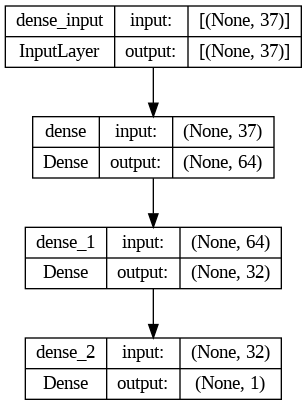

In [40]:
# Plot Layers

tf.keras.utils.plot_model(model_sequential1, show_shapes=True)

## 6.2 Functional API

In [41]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [42]:
# Create Functional Model

from tensorflow.keras.layers import Input, concatenate
from tensorflow.keras import Model

input_layer = Input(shape=(37,))
hidden_layer_1 = Dense(128,)(input_layer)
hidden_layer_2 = Dense(64, )(hidden_layer_1)

concat_layer = concatenate([input_layer, hidden_layer_2])
output_layer = Dense(1,activation='sigmoid')(concat_layer)

model_functional1 = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_functional1.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics='accuracy')
model_functional1.summary

<bound method Model.summary of <keras.engine.functional.Functional object at 0x7f6dd86a6d00>>

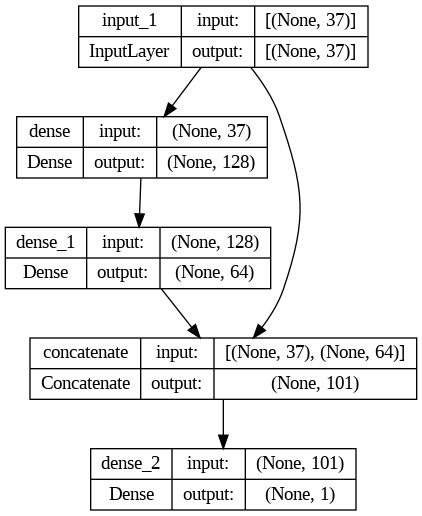

In [43]:
# Plot Layers

tf.keras.utils.plot_model(model_functional1, show_shapes=True)

- We Build our first functional API model with 2 hidden layers (128 neuorons for fisrt hidden layer and 64 neurons for second hidden layers) and without activation function in hidden layers. then we don concate for hidden layer 2 with input. and We have 1 output with activation = sigmoid.

- For optimizer we use 'adam' , Because One of the advantages of using Adam optimizer is its ability to overcome sparse or scattered gradient problems thereby accelerating the convergence of ANN models, for loss function we use 'binary_crossentropy' because the output is only 1 class between 0 or 1, and metrics 'accuracy' for monitoring the model training.

# 7 - Model Training
> Cell pada bagian ini hanya berisi code untuk melatih model dan output yang dihasilkan. Lakukan beberapa kali proses training dengan hyperparameter yang berbeda untuk melihat hasil yang didapatkan. Analisis dan narasikan hasil ini pada bagian Model Evaluation.

## Sequential Model Training

### Sequential Api 1st Model

For model training we use input pipeline train_dataset for training and val_dataset for validation, with 100 epochs for our model training. And for Batch Size we use 10.

In [44]:
# Train the model

%%time
history_seq1 = model_sequential1.fit(train_dataset,
                                   epochs=100,
                                   validation_data=(val_dataset),
                                   batch_size=10)

Epoch 1/100
418/418 [==============================] - 7s 9ms/step - loss: 0.2951 - accuracy: 0.8491 - val_loss: 0.2461 - val_accuracy: 0.8643
Epoch 2/100
418/418 [==============================] - 2s 5ms/step - loss: 0.2597 - accuracy: 0.8565 - val_loss: 0.2452 - val_accuracy: 0.8686
Epoch 3/100
418/418 [==============================] - 2s 5ms/step - loss: 0.2585 - accuracy: 0.8575 - val_loss: 0.2451 - val_accuracy: 0.8660
Epoch 4/100
418/418 [==============================] - 3s 7ms/step - loss: 0.2582 - accuracy: 0.8574 - val_loss: 0.2444 - val_accuracy: 0.8647
Epoch 5/100
418/418 [==============================] - 4s 9ms/step - loss: 0.2574 - accuracy: 0.8595 - val_loss: 0.2454 - val_accuracy: 0.8605
Epoch 6/100
418/418 [==============================] - 2s 5ms/step - loss: 0.2571 - accuracy: 0.8580 - val_loss: 0.2451 - val_accuracy: 0.8620
Epoch 7/100
418/418 [==============================] - 2s 5ms/step - loss: 0.2568 - accuracy: 0.8585 - val_loss: 0.2437 - val_accuracy: 0.8671

In [45]:
# Create DataFrame

history_seq_df1 = pd.DataFrame(history_seq1.history)
history_seq_df1

,loss,accuracy,val_loss,val_accuracy
0,0.295132,0.849061,0.246055,0.864321
1,0.259741,0.856544,0.245166,0.868561
2,0.258506,0.857517,0.245111,0.866017
3,0.258217,0.857405,0.244393,0.864745
4,0.257369,0.859463,0.245369,0.860505
...,...,...,...,...
95,0.253644,0.864626,0.241760,0.875768
96,0.253603,0.865187,0.241717,0.875980
97,0.253587,0.865113,0.241829,0.879160
98,0.253634,0.865449,0.241848,0.877889


<Axes: >

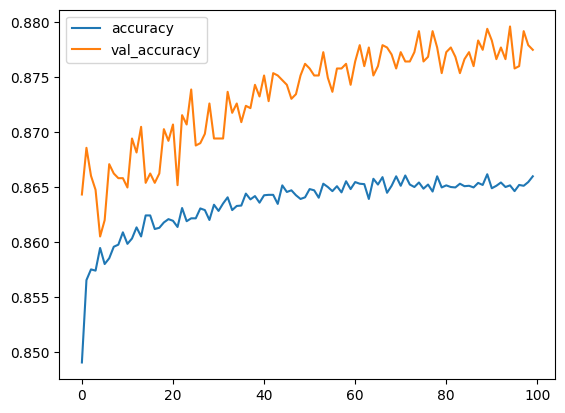

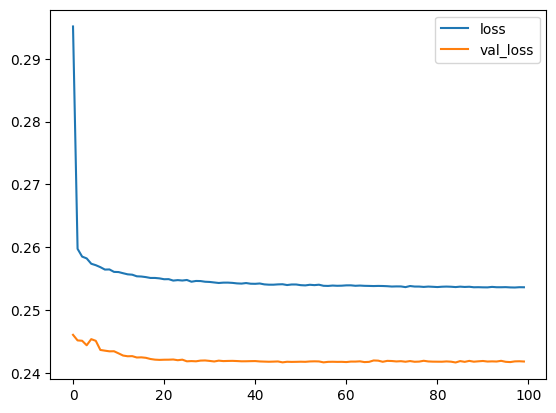

In [46]:
# Plot Trainig Results

history_seq_df1[['accuracy', 'val_accuracy']].plot()
history_seq_df1[['loss', 'val_loss']].plot()

> Model Analysis:

- As we can see from the graph above our first sequential API model is gradually having more gap between their accuracy and val_accuracy, and also the val_accuracy is better than the accuracy, the gap is not that big only around   0.02 but the accuracy looks volatile. And for loss and val_loss constanly have gap around 0.01. overall this model is quite good but we'll try to improve this model, we hope to improving this model performance until we got more than 0.90 score and reduce the gap between accuracy and val accuracy. 

> Model advantages and disadvantages:
 
 - Advantages:
  1. The model is quite simple and easy to implement
  2. The model have high accuracy 0.87 and val_accuracy 0.86 for the given dataset
  3. The model have small loss 0.25 and val_loss 0.24 for the given dataset.

 - Disadvantages:
  1. There is no use of the activation function in the hidden layer, so the model may not be able to extract more complex features from the given dataset
  2. Because the number of epochs is quite high, the model can experience overfitting on the training dataset, which reduces the ability to generalize to the test dataset, we can see the gap is getting bigger at the end of the train procces.



### Sequential Api 2nd Model (Model Improvement)

In [149]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [150]:
# Create Sequintial API model 2

model_sequential2 = Sequential()
model_sequential2.add(Dense(64, activation='relu', input_shape=(37,))) #hidden layer 1
model_sequential2.add(Dense(32, activation='relu')) #Hidden Layer 2
model_sequential2.add(Dense(1, activation='sigmoid')) #Output Layer

# Compile
model_sequential2.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics=['accuracy'])

model_sequential2.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2432      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,545
Trainable params: 4,545
Non-trainable params: 0
_________________________________________________________________


- We Build our second Sequential API model (Improved model) with 2 hidden layers (64 neuorons for fisrt hidden layer and 32 neurons for second hidden layers) and now we add activation function in hidden layers 1 and hidden layer 2 with activation='relu'. and for output we have 1 output with activation = sigmoid.

- For optimizer we still use 'adam' , One of the advantages of using Adam optimizer is its ability to overcome sparse or scattered gradient problems thereby accelerating the convergence of ANN models, for loss function we still use 'binary_crossentropy' and for metrics also we still use 'accuracy' for monitoring the model training.

In [151]:
# Train the model 2

%%time
history_seq2 = model_sequential2.fit(train_dataset,
                                   epochs=60,
                                   validation_data=(val_dataset),
                                   batch_size=10)

Epoch 1/60
418/418 [==============================] - 3s 5ms/step - loss: 0.3275 - accuracy: 0.8327 - val_loss: 0.2484 - val_accuracy: 0.8673
Epoch 2/60
418/418 [==============================] - 2s 4ms/step - loss: 0.2591 - accuracy: 0.8578 - val_loss: 0.2462 - val_accuracy: 0.8630
Epoch 3/60
418/418 [==============================] - 1s 3ms/step - loss: 0.2563 - accuracy: 0.8591 - val_loss: 0.2439 - val_accuracy: 0.8669
Epoch 4/60
418/418 [==============================] - 1s 3ms/step - loss: 0.2552 - accuracy: 0.8631 - val_loss: 0.2441 - val_accuracy: 0.8647
Epoch 5/60
418/418 [==============================] - 1s 3ms/step - loss: 0.2538 - accuracy: 0.8641 - val_loss: 0.2449 - val_accuracy: 0.8628
Epoch 6/60
418/418 [==============================] - 1s 3ms/step - loss: 0.2529 - accuracy: 0.8657 - val_loss: 0.2466 - val_accuracy: 0.8616
Epoch 7/60
418/418 [==============================] - 1s 3ms/step - loss: 0.2523 - accuracy: 0.8656 - val_loss: 0.2448 - val_accuracy: 0.8630
Epoch 

For model training the second model we use input pipeline train_dataset for training and val_dataset for validation, but now we only use 60 epochs instead of 100 epochs in our first model training. And for Batch Size we still use 10.

In [152]:
# Create DataFrame

history_seq_df2 = pd.DataFrame(history_seq2.history)
history_seq_df2

,loss,accuracy,val_loss,val_accuracy
0,0.327452,0.832710,0.248356,0.867289
1,0.259052,0.857779,0.246183,0.863049
2,0.256285,0.859089,0.243931,0.866865
3,0.255213,0.863055,0.244125,0.864745
4,0.253843,0.864065,0.244871,0.862837
5,0.252874,0.865749,0.246550,0.861565
6,0.252337,0.865636,0.244773,0.863049
7,0.251068,0.867171,0.244594,0.863473
8,0.250391,0.868967,0.245470,0.862201
9,0.249750,0.869116,0.244696,0.865593


<Axes: >

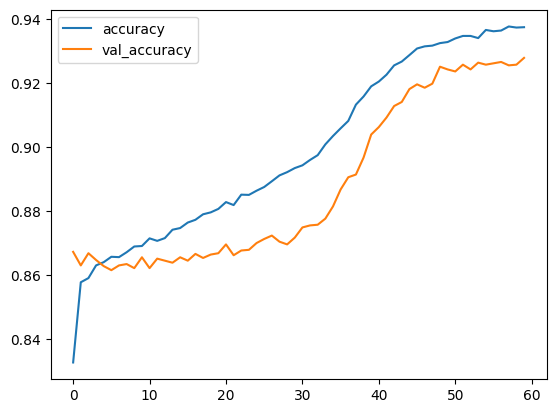

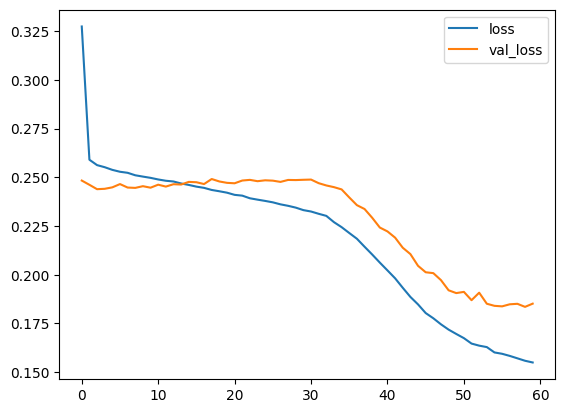

In [153]:
# Plot Trainig Results

history_seq_df2[['accuracy', 'val_accuracy']].plot()
history_seq_df2[['loss', 'val_loss']].plot()

> Model analysis:

- As we can see from the graph above for our second sequential API model is constantly having small gap between their accuracy and val_accuracy, but now for our 2nd model the accuracy is better than the val_accuracy, the gap between accuracy and val accuracy is very small only around 0.01. And for loss and val_loss also constanly have small gap around 0.02. overall this model is very good because after doing the analysis we found out this model is a good-fit.

> Model advantages and disadvantages:
 
 - Advantages:
  1. The model have high accuracy 0.93 and val_accuracy 0.92 for the given dataset
  2. The model have small loss 0.15 and val_loss 0.18 for the given dataset.
  3. Model training time is relatively fast. only took 1min 26s for training data, faster than the first model which took more than 2 minute for training data.

 - Disadvantages:
  1. The number of epochs used (60) can be adjusted again to find the optimal point without sacrificing model time and performance. as we can see from epoch 40-60 the score is not significanly incrase.
  2. This model does not use techniques such as batch normalization or learning rate scheduling, which can help improve the performance and stability of the model during training.

> is our model Improvement success?

- After we analysis our 1st and 2nd sequential API model, We found out our goal to Improve this model is *succed*, we can see from the score for accuracy and val_accuracy now have score more than 0.9, before improvement we only got 0.87 at maximum. and also we succed to reduce the gap between accuracy and val_accuracy, the val_loss score also reduced from the first model from around 0.24 to 0.17. The train time for model also reduce from 2min 35s at 1st model, for 2nd model only took 1min 26s for model training.

## Functional API Model Training 

### Functional Api 1st Model

In [154]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

For model training on Functional Api 1st Model, we use input pipeline train_dataset for training and val_dataset for validation, with 100 epochs for our model training. And for Batch Size we use 20.

In [53]:
# Train the model

%%time
history_func1 = model_functional1.fit(train_dataset,
                                   epochs=100,
                                   validation_data=(val_dataset),
                                   batch_size=20)

Epoch 1/100
418/418 [==============================] - 3s 5ms/step - loss: 0.2886 - accuracy: 0.8440 - val_loss: 0.2503 - val_accuracy: 0.8594
Epoch 2/100
418/418 [==============================] - 1s 3ms/step - loss: 0.2611 - accuracy: 0.8542 - val_loss: 0.2474 - val_accuracy: 0.8614
Epoch 3/100
418/418 [==============================] - 1s 2ms/step - loss: 0.2595 - accuracy: 0.8553 - val_loss: 0.2448 - val_accuracy: 0.8669
Epoch 4/100
418/418 [==============================] - 1s 3ms/step - loss: 0.2583 - accuracy: 0.8574 - val_loss: 0.2444 - val_accuracy: 0.8662
Epoch 5/100
418/418 [==============================] - 1s 3ms/step - loss: 0.2576 - accuracy: 0.8583 - val_loss: 0.2442 - val_accuracy: 0.8656
Epoch 6/100
418/418 [==============================] - 1s 3ms/step - loss: 0.2573 - accuracy: 0.8593 - val_loss: 0.2439 - val_accuracy: 0.8662
Epoch 7/100
418/418 [==============================] - 1s 3ms/step - loss: 0.2568 - accuracy: 0.8598 - val_loss: 0.2438 - val_accuracy: 0.8645

In [54]:
## Create DataFrame

history_func_df1 = pd.DataFrame(history_func1.history)
history_func_df1

,loss,accuracy,val_loss,val_accuracy
0,0.288642,0.844010,0.250285,0.859445
1,0.261131,0.854187,0.247388,0.861353
2,0.259535,0.855272,0.244796,0.866865
3,0.258300,0.857367,0.244408,0.866229
4,0.257642,0.858265,0.244183,0.865593
...,...,...,...,...
95,0.253649,0.866048,0.241841,0.874497
96,0.253693,0.866235,0.241957,0.875133
97,0.253694,0.865711,0.241862,0.874285
98,0.253662,0.865300,0.242066,0.878101


<Axes: >

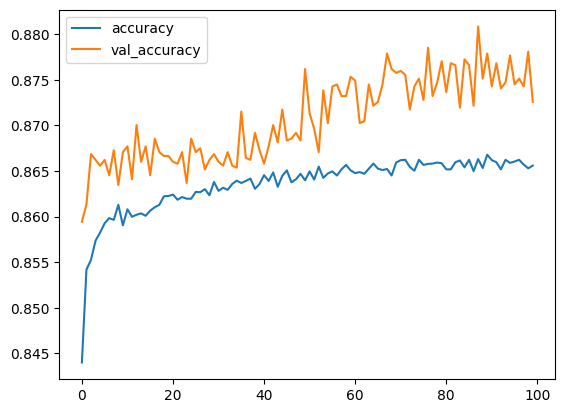

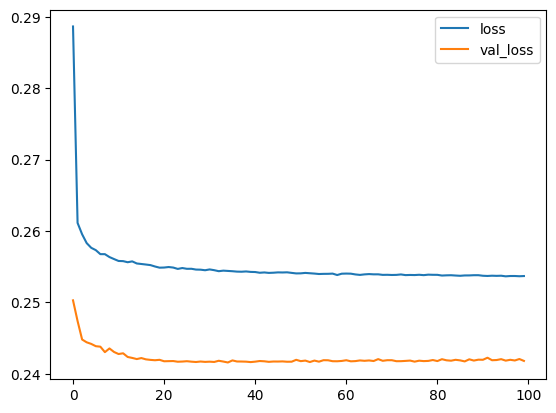

In [55]:
# Plot

history_func_df1[['accuracy', 'val_accuracy']].plot()
history_func_df1[['loss', 'val_loss']].plot()

> Model Analysis:

- As we can see from the graph above our first functional API model is gradually having more gap between their accuracy and val_accuracy, and at the process the gap is getting bigger from start to finish. and also same with the sequential base model the val_accuracy is better than the accuracy, the gap is not that big only around  0.01 but the val_accuracy looks volatile. And for loss and val_loss constanly have gap around 0.01. overall this model is quite good but we'll try to improve this model, we hope to improving this model performance until we got more than 0.90 score and reduce the gap between accuracy and val accuracy. also we want to get val_loss under 0.2

> Model advantages and disadvantages:
 
 - Advantages:
  1. The model has quite good performance, with accuracy and val_accuracy above 0.8.
  2. The model have small loss 0.25 and val_loss 0.24 for the given dataset.
  3. The model has several hidden layers, so the model can learn complex representations of the input data.

 - Disadvantages:
  1. There is no activation in the hidden layer which can make it difficult for the model to learn complex patterns in the data.
  2. The model is not equipped with regularization techniques such as dropout or dimension reduction so that it can experience overfitting in the training data. as we can see from our model the val accuracy is volatile and the gap is getting bigger from the procces.


### Functional Api 2nd Model

In [131]:
# Clear Session

seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

In [127]:
# Create Functional Model 2

input_layer = Input(shape=(37,))
hidden_layer_1 = Dense(64, activation='relu')(input_layer)
hidden_layer_2 = Dense(32, activation='relu')(hidden_layer_1)

concat_layer = concatenate([input_layer, hidden_layer_2])
output_layer = Dense(1,activation='sigmoid')(concat_layer)

model_functional2 = Model(inputs=input_layer, outputs=output_layer)

# Compile
model_functional2.compile(loss='binary_crossentropy',
                         optimizer='adam',
                         metrics='accuracy')

- We Build our second Functional API model (Improved model) with 2 hidden layers now we use 64 neuorons for fisrt hidden layer and 32 neurons for second hidden layers, Before we use 128 and 64 on model 1st. and now we add also activation function in hidden layers 1 and hidden layer 2 with activation='relu'. and for output we have 1 output with activation = sigmoid.

- For optimizer we still use 'adam' , One of the advantages of using Adam optimizer is its ability to overcome sparse or scattered gradient problems thereby accelerating the convergence of ANN models, for loss function we still use 'binary_crossentropy' and for metrics also we still use 'accuracy' for monitoring the model training.

In [128]:
# Train the model

%%time
history_func2 = model_functional2.fit(train_dataset,
                                   epochs=60,
                                   validation_data=(val_dataset),
                                   batch_size=20)

Epoch 1/60
418/418 [==============================] - 3s 5ms/step - loss: 0.3308 - accuracy: 0.8215 - val_loss: 0.2505 - val_accuracy: 0.8569
Epoch 2/60
418/418 [==============================] - 1s 3ms/step - loss: 0.2584 - accuracy: 0.8595 - val_loss: 0.2458 - val_accuracy: 0.8630
Epoch 3/60
418/418 [==============================] - 1s 3ms/step - loss: 0.2562 - accuracy: 0.8611 - val_loss: 0.2448 - val_accuracy: 0.8681
Epoch 4/60
418/418 [==============================] - 1s 2ms/step - loss: 0.2543 - accuracy: 0.8649 - val_loss: 0.2446 - val_accuracy: 0.8675
Epoch 5/60
418/418 [==============================] - 1s 3ms/step - loss: 0.2534 - accuracy: 0.8657 - val_loss: 0.2443 - val_accuracy: 0.8698
Epoch 6/60
418/418 [==============================] - 1s 2ms/step - loss: 0.2525 - accuracy: 0.8666 - val_loss: 0.2455 - val_accuracy: 0.8662
Epoch 7/60
418/418 [==============================] - 1s 3ms/step - loss: 0.2521 - accuracy: 0.8657 - val_loss: 0.2445 - val_accuracy: 0.8679
Epoch 

For model training in the second model we use input pipeline train_dataset for training and val_dataset for validation, but now we only use 60 epochs instead of 100 epochs in our first model training. And for Batch Size we use 20.

In [129]:
## Create DataFrame

history_func_df2 = pd.DataFrame(history_func2.history)
history_func_df2

,loss,accuracy,val_loss,val_accuracy
0,0.330761,0.821522,0.250463,0.856901
1,0.258416,0.859463,0.245752,0.863049
2,0.256236,0.861146,0.244846,0.868137
3,0.254337,0.864888,0.244608,0.867501
4,0.253424,0.865711,0.244313,0.869833
5,0.252534,0.866609,0.245506,0.866229
6,0.252140,0.865674,0.244529,0.867925
7,0.251313,0.867096,0.245392,0.867501
8,0.250710,0.867620,0.245552,0.866017
9,0.249885,0.869004,0.246384,0.866017


<Axes: >

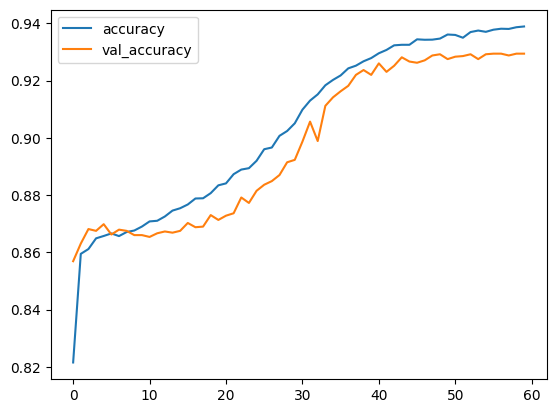

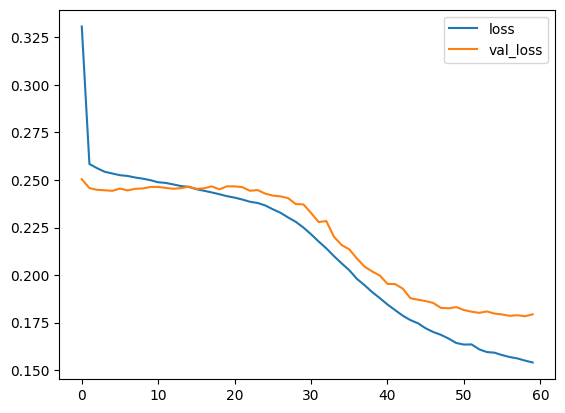

In [130]:
# Plot

history_func_df2[['accuracy', 'val_accuracy']].plot()
history_func_df2[['loss', 'val_loss']].plot()

> Model analysis:

- As we can see from the graph above for our second functional API model is constantly having small gap between their accuracy and val_accuracy, but now for our 2nd model the accuracy is better than the val_accuracy, the gap between accuracy and val accuracy is very small only almost doesnt have gap. And for loss and val_loss also constanly have small gap around 0.02. overall this model is very good because after doing the analysis we found out this model is a good-fit.

> Model advantages and disadvantages:
 
 - Advantages:
  1. The model have high accuracy 0.93 and val_accuracy 0.92 for the given dataset
  2. Using the ReLU activation function on the hidden layer, which is a popular activation function and often provides good performance in artificial neural networks.
  3. Adding a smaller number of layers and neurons to the hidden layer than the Model 1 Functional API, so that the number of parameters in this model is less and reduces the risk of overfitting. 

 - Disadvantages:
  1. The number of epochs used (60) can be adjusted again to find the optimal point without sacrificing model time and performance. Because as we can see at around epoch 40 the score already reaching ther peak. 
  2. The use of the number of neurons in the hidden layer is still trial and error and cannot be scientifically justified.

> is our model Improvement success?

- After we analysis our 1st and 2nd functional API model, We found out our goal to Improve this model is *succed*, we can see from the score for accuracy and val_accuracy now have score more than 0.9, before improvement we only got 0.87 at maximum. and also we succed to reduce the gap between accuracy and val_accuracy, the val_loss score also reduced from the first model from around 0.24 to 0.17. The train time for model also reduce from 2min 2s at 25st model, for 2nd model only took 1min 29s for model training.

# 8 - Model Evaluation
> Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan bagaimana performa model berdasarkan metrics yang dipilih. Hal ini harus dibuktikan dengan visualisasi tren performa dan/atau tingkat kesalahan model. Lakukan analisis terkait dengan hasil pada model dan tuliskan hasil analisisnya.

## 8.1 Model Evaluation Train-Set Sequential API Model and Functional API Model

In [155]:
# Predict y in train set by using Selected Sequential API Model and Functional API Model

y_pred_train_seqt = model_sequential2.predict(X_train)
y_pred_train_func = model_functional2.predict(X_train)

836/836 [==============================] - 1s 1ms/step


In [156]:
# Convert y_pred (still in probablity number) into class 1,0 or class 0 using numpy

y_pred_train_seqt = np.where(y_pred_train_seqt > 0.5, 1, 0)
y_pred_train_func = np.where(y_pred_train_func > 0.5, 1, 0)

In [157]:
print('Classification Report in Train Set on Sequential API model:\n', classification_report(y_train, y_pred_train_seqt))
print('Classification Report in Train Set on Functional API model:\n', classification_report(y_train, y_pred_train_func))

Classification Report in Train Set on Sequential API model:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93     12269
           1       0.94      0.95      0.94     14457

    accuracy                           0.94     26726
   macro avg       0.94      0.94      0.94     26726
weighted avg       0.94      0.94      0.94     26726

Classification Report in Train Set on Functional API model:
               precision    recall  f1-score   support

           0       0.94      0.93      0.93     12269
           1       0.94      0.95      0.94     14457

    accuracy                           0.94     26726
   macro avg       0.94      0.94      0.94     26726
weighted avg       0.94      0.94      0.94     26726



> Classification Report for train-set Analysis

Based on evaluation metrics for data train above, we can see that both model (Sequential API & Functional API) Result are very good. All evaluation matrix score are above 0.9

As our focus is false negative(Customer that predicted not churn, but will actually churn). So our matrics evaluation priority is recall score, for sequential API, we have recall score 0.93 on class 0 and 0.95 on class 1.
and for functional API, we have recall score 0.93 on class 0 and 0.95 on class 1.

because the difference is very tight we use the f1-score as an additional comparison. for sequential API, we have f1-score 0.93 on class 0 and 0.94 on class 1. and for functional API, we have f1-score 0.93 on class 0 and 0.94 on class 1.

Based on our classification report analysis, we found out that both Sequential API & Functional API model very have good result in every matrics evaluation in every class, And for the metrics evaluation score also both model is equeal. so We'll look at another evaluation, we;ll use confussion matric to decide the best model.



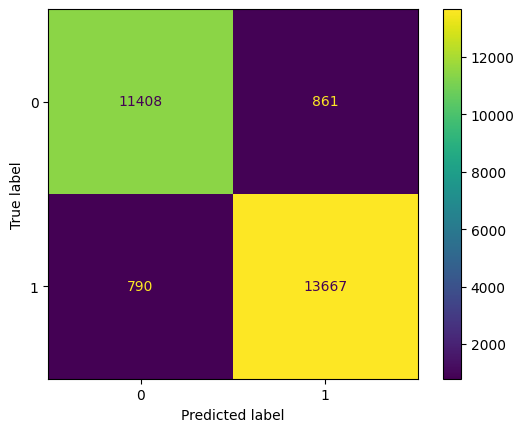

In [158]:
# Evaluate using confusion_matrix in Train Set from Sequential API Model

cmtrs = confusion_matrix(y_train, y_pred_train_seqt)
distrs = ConfusionMatrixDisplay(confusion_matrix=cmtrs)

distrs.plot()
plt.show()

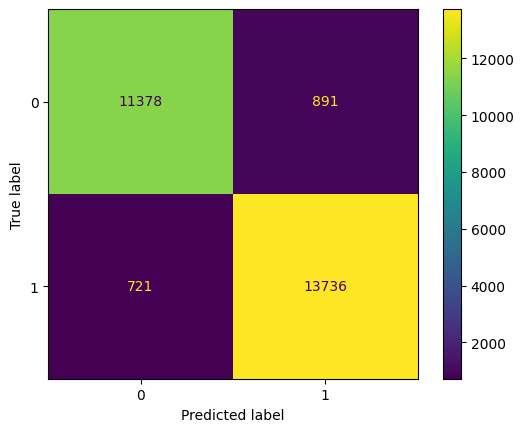

In [159]:
# Evaluate using confusion_matrix in Train Set from Functional API Model

cmtrf = confusion_matrix(y_train, y_pred_train_func)
distrf = ConfusionMatrixDisplay(confusion_matrix=cmtrf)

distrf.plot()
plt.show()

> Confussion Matrix for train set Analysis: 

- For confussion matrix we declared label 0 = not churn as negative and label 1 = churn as positive. So the explaination is like this:
  1. True Positive(TP) : Model prediction is 1 = churn and actual is 1 = churn. 
  2. True Negative(TN) : Model prediction is 0 = not churn and actual is 0 = not churn.
  3. False Positive(FP) : Model prediction is 1 = churn and actual is 0 = not churn.
  4. False Negative(FN) : Model prediction is 0 = not churn and actual is 1 = churn.

- As our focus is on False negative, we'll compared the false negative result from sequential API model and Function API model. For Sequential Api Model have 790 false negative data and for functional API model have 721 false negative data.

- So based on our confussion matrix analysis for data train, we found out the Functional API model is have better performence to predict false negative data than sequential API model.



## 8.2 Model Evaluation Test Set Sequential API Model and Functional API Model

In [160]:
# Predict y in train set by using Selected Sequential API Model and Functional API Model

y_pred_test_seqt = model_sequential2.predict(X_test)
y_pred_test_func = model_functional2.predict(X_test)

174/174 [==============================] - 0s 2ms/step


In [161]:
# Convert y_pred (still in probablity number) into class 1,0 or class 0 using numpy

y_pred_test_seqt = np.where(y_pred_test_seqt > 0.5, 1, 0)
y_pred_test_func = np.where(y_pred_test_func > 0.5, 1, 0)

In [162]:
print('Classification Report in Test Set on Sequential API model:\n', classification_report(y_test, y_pred_test_seqt))
print('Classification Report in Test Set on Functional API model:\n', classification_report(y_test, y_pred_test_func))

Classification Report in Test Set on Sequential API model:
               precision    recall  f1-score   support

           0       0.91      0.92      0.91      2521
           1       0.93      0.93      0.93      3028

    accuracy                           0.92      5549
   macro avg       0.92      0.92      0.92      5549
weighted avg       0.92      0.92      0.92      5549

Classification Report in Test Set on Functional API model:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91      2521
           1       0.92      0.93      0.93      3028

    accuracy                           0.92      5549
   macro avg       0.92      0.92      0.92      5549
weighted avg       0.92      0.92      0.92      5549



> Classification Report for test-set Analysis

- Based on evaluation metrics for data test above, we can see that both model (Sequential API & Functional API) Result are very good. All evaluation matrix score are above 0.9

- As our focus is false negative(Customer that predicted not churn, but will actually churn). So our matrics evaluation priority is recall score, for sequential API, we have recall score 0.92 on class 0 and 0.93 on class 1.
and for functional API, we have recall score 0.91 on class 0 and 0.93 on class 1.

- because the difference is very tight we use the f1-score as an additional comparison. for sequential API, we have f1-score 0.91 on class 0 and 0.93 on class 1. and for functional API, we have f1-score 0.91 on class 0 and 0.93 on class 1.

- Based on our classification report analysis, we found out that both Sequential API & Functional API model very have good result in every matrics evaluation in every class, And for the metrics evaluation score also both model is equeal. so We'll look at another evaluation, we'll use confussion matric to decide the best model.

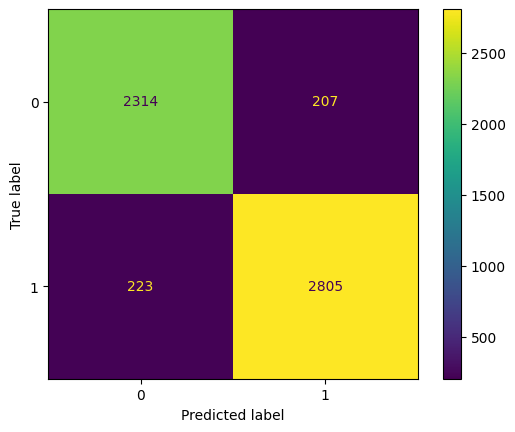

In [163]:
# Evaluate using confusion_matrix in Test Set from Sequential API Model

cmtes = confusion_matrix(y_test, y_pred_test_seqt)
distes = ConfusionMatrixDisplay(confusion_matrix=cmtes)

distes.plot()
plt.show()

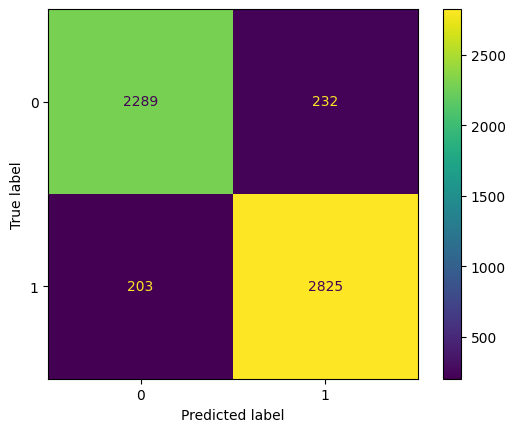

In [164]:
# Evaluate using confusion_matrix in Test Set from Sequential API Model

cmtes = confusion_matrix(y_test, y_pred_test_func)
distes = ConfusionMatrixDisplay(confusion_matrix=cmtes)

distes.plot()
plt.show()

> Confussion Matrix for test set Analysis: 

- For confussion matrix we declared label 0 = not churn as negative and label 1 = churn as positive. So the explaination is like this:
  1. True Positive(TP) : Model prediction is 1 = churn and actual is 1 = churn. 
  2. True Negative(TN) : Model prediction is 0 = not churn and actual is 0 = not churn.
  3. False Positive(FP) : Model prediction is 1 = churn and actual is 0 = not churn.
  4. False Negative(FN) : Model prediction is 0 = not churn and actual is 1 = churn.

- As our focus is on False negative, we'll compared the false negative result from sequential API model and Function API model. For Sequential Api Model have 223 false negative data and for functional API model have 203 false negative data.

- So based on our confussion matrix analysis for data train, we found out the functiona API model is have better performence to predict false negative data than sequential API model.



## Best Model Analysis

- Based on the classification report and confusion matrix data that has been provided, both the Sequential API and Functional API models have very good performance in predicting churn. Both models have a high recall rate (the model's ability to recognize all positive cases), with a recall value on the train data and test data above 0.9.

- However, if our focus is on suppressing false negatives, or avoiding predicting that a customer will not churn when in fact he will, then the functional API model may be slightly better because it has slightly lower false negative values in the test data (203 vs 223 on the sequential API). 

- Therefore, the two models perform almost equally well But based from our analysis functional API model is slightly better then sequential API model. So for this project we choose functional API model as our best model.

# 9 - Model Saving
> Pada bagian ini, dilakukan proses penyimpanan model dan file-file lain yang terkait dengan hasil proses pembuatan model. Pilihlah 1 arsitektur ANN yang terbaik berdasarkan hasil evaluasi sebelumnya.

In [178]:
# Save Pipeline

import pickle

with open('final_pipeline.pkl', 'wb') as file_1:
  pickle.dump(final_pipeline, file_1)

In [179]:
# Freeze Model

model_functional2.trainable = False
model_functional2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 37)]         0           []                               
                                                                                                  
 dense (Dense)                  (None, 64)           2432        ['input_1[0][0]']                
                                                                                                  
 dense_1 (Dense)                (None, 32)           2080        ['dense[0][0]']                  
                                                                                                  
 concatenate (Concatenate)      (None, 69)           0           ['input_1[0][0]',                
                                                                  'dense_1[0][0]']            

In [180]:
# Save ANN Model

model_functional2.save('churn_model.h5')

# 10 - Model Inference

> Model yang sudah dilatih akan dicoba pada data yang bukan termasuk ke dalam train-set, val-set, ataupun test-set. Data ini harus dalam format yang asli, bukan data yang sudah di-scaled.

# 11 - Pengambilan Kesimpulan

> Pada bagian terakhir ini, harus berisi kesimpulan yang mencerminkan hasil yang didapat dengan objective yang sudah ditulis di bagian pengenalan.

> Based on EDA Analysis: 

-  Based on histogram graphs on EDA section, We can see the distribution data for each column, Only Column 'age' that appears to have normal distributed data. And the other columns like 'days_since_last_login', 'avg_time_spent', 'avg_transaction_value', 'avg_transaction_value', 'avg_frequency_login_days', 'points_in_wallet' are skewed distributed data.
- After we Analyze on EDA section we found out that we have only 6 categorical column that have correlation to our target, 'joined_through_referral', 'membership_category' , 'preferred_offer_types', 'medium_of_operation', 'complaint_status', 'feedback' so we use this column on features selection. and for another columns we will drop on features selection.
- From the data and graphs on EDA section we can see information from our target. Label 0 = not churn have value 16992 and label 1 = Churn have value 20018. The target data from dataframe have proportion 0.55/0.45 so the data from our target is still balance. Because doesn't have much different. 
- From heatmap correlation matrix on our EDA section we can see the information for numerical columns that have correlation to our target. 'avg_frequency_login_days' column have the biggest positive corelation to our target. and 'avg_transaction_value' and 'points_in_wallet' have the biggest negative correlation to our target. And the other columns seems doesn't have enough correlation to our target. so for the columns doesn't have correlation to target we'll drop the column on features selection.

> Based on Model Training:

- For our first sequential API model is gradually having more gap between their accuracy and val_accuracy, and also the val_accuracy is better than the accuracy, the gap is not that big only around   0.02 but the accuracy looks volatile. And for loss and val_loss constanly have gap around 0.01. overall this model is quite good but we'll try to improve this model, we hope to improving this model performance until we got more than 0.90 score and reduce the gap between accuracy and val accuracy. 
- for our second sequential API model is constantly having small gap between their accuracy and val_accuracy, but now for our 2nd model the accuracy is better than the val_accuracy, the gap between accuracy and val accuracy is very small only around 0.01. And for loss and val_loss also constanly have small gap around 0.02. overall this model is very good because after doing the analysis we found out this model is a good-fit. 
- For our first functional API model is gradually having more gap between their accuracy and val_accuracy, and at the process the gap is getting bigger from start to finish. and also same with the sequential base model the val_accuracy is better than the accuracy, the gap is not that big only around  0.013 but the val_accuracy looks volatile. And for loss and val_loss constanly have gap around 0.01. overall this model is quite good but we'll try to improve this model, we hope to improving this model performance until we got more than 0.90 score and reduce the gap between accuracy and val accuracy. also we want to get val_loss under 0.2
- For our second functional API model is constantly having small gap between their accuracy and val_accuracy, but now for our 2nd model the accuracy is better than the val_accuracy, the gap between accuracy and val accuracy is very small only almost doesnt have gap. And for loss and val_loss also constanly have small gap around 0.02. overall this model is very good because after doing the analysis we found out this model is a good-fit.
- And after we analysis our 4 model, we found out we succes to improve our model, beacuse our improved model have better accuracy& val_accuracy score than the 1st model, also we succed to reduce the loss and val_loss on our 2nd model. The training time also reduce around 50% so make training model more faster and efficient.

> Base on Model Evaluation

- Based on the classification report and confusion matrix data that has been provided, both the Sequential API and Functional API models have very good performance in predicting churn. Both models have a high recall rate (the model's ability to recognize all positive cases), with a recall value on the train data and test data above 0.9.

- However, if our focus is on suppressing false negatives, or avoiding predicting that a customer will not churn when in fact he will, then the functional API model may be slightly better because it has slightly lower false negative values in the test data (203 vs 223 on the sequential API). 

- Therefore, the two models perform almost equally well But based from our analysis functional API model is slightly better then sequential API model. So for this project we choose functional API model as our best model.

> Bussines Implementation: 

- We can use this model, Because our model was a good fit, and as our focus is false negative, this model also can predict Negative class with good result.
- And we have advice to our client to treat the customer based on their prediction, for customer that got predicted not churn, we can give program like a loyality points and more loyality points can trade for a prize, so can make the customer more loyal.
- And for customer that predicted churn, we can give a discount for the bill, and we can also give program like a paylater so customer can continue using our service without worry to pay the bill at the due date.

> Further Improvement: 

- Overall the model we train already good-fit and have good performance but, we still can improve with trying using another parameter for the model, in hope to improve the model performances.